In [5]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split


df = pd.read_csv("/Users/apple/Desktop/train.csv")
print(df.head())





   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation


In [6]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#\w+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df["cleaned_text"] = df["tweet"].apply(clean_text)
print(df[["tweet", "cleaned_text"]].head())


[nltk_data] Downloading package stopwords to /Users/apple/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/apple/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/apple/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                               tweet  \
0   @user when a father is dysfunctional and is s...   
1  @user @user thanks for #lyft credit i can't us...   
2                                bihday your majesty   
3  #model   i love u take with u all the time in ...   
4             factsguide: society now    #motivation   

                                        cleaned_text  
0  father dysfunctional selfish drag kid dysfunction  
1  thanks credit cant use cause dont offer wheelc...  
2                                     bihday majesty  
3                              love u take u time ur  
4                                 factsguide society  


📌 Logistic Regression Accuracy: 0.9485374628499922

📌 Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      5937
           1       0.92      0.30      0.46       456

    accuracy                           0.95      6393
   macro avg       0.93      0.65      0.72      6393
weighted avg       0.95      0.95      0.94      6393



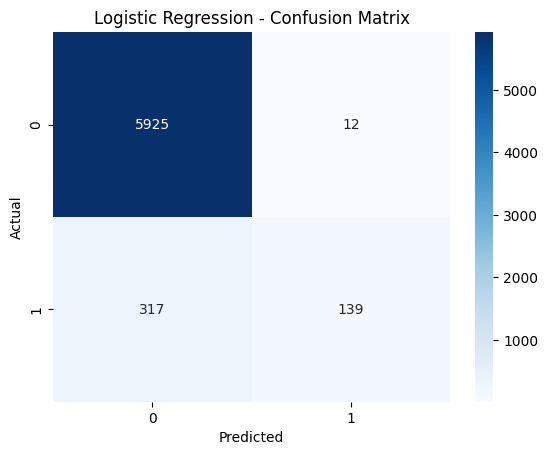

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


vectorizer = TfidfVectorizer(max_features=20000, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train_tfidf, y_train)


y_pred_lr = lr_model.predict(X_test_tfidf)
print("📌 Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\n📌 Classification Report:\n", classification_report(y_test, y_pred_lr))


import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression - Confusion Matrix")
plt.show()


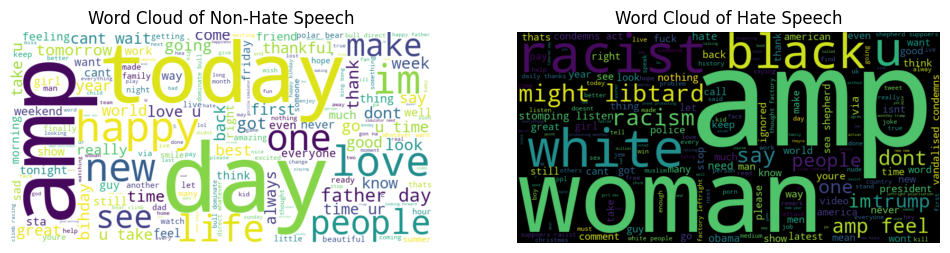

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate word clouds for both classes
positive_text = " ".join(df[df["label"] == 0]["cleaned_text"])
negative_text = " ".join(df[df["label"] == 1]["cleaned_text"])

wordcloud_pos = WordCloud(width=800, height=400, background_color="white").generate(positive_text)
wordcloud_neg = WordCloud(width=800, height=400, background_color="black").generate(negative_text)

# Plot the word clouds
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.title("Word Cloud of Non-Hate Speech")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.title("Word Cloud of Hate Speech")
plt.axis("off")

plt.show()


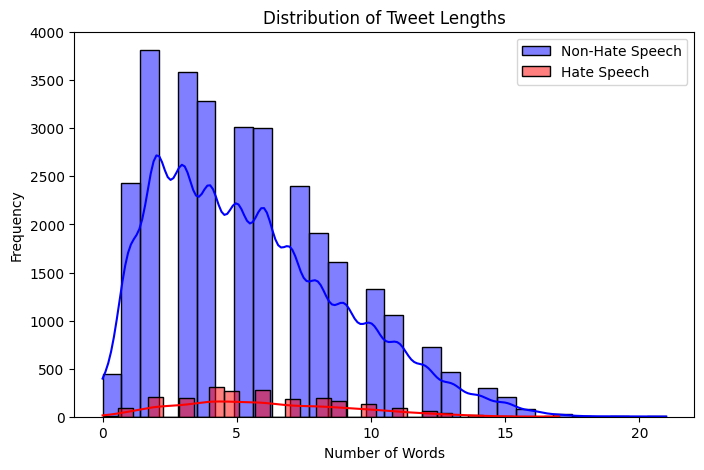

In [9]:
df["text_length"] = df["cleaned_text"].apply(lambda x: len(x.split()))

plt.figure(figsize=(8,5))
sns.histplot(df[df["label"] == 0]["text_length"], bins=30, kde=True, color="blue", label="Non-Hate Speech")
sns.histplot(df[df["label"] == 1]["text_length"], bins=30, kde=True, color="red", label="Hate Speech")
plt.legend()
plt.title("Distribution of Tweet Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


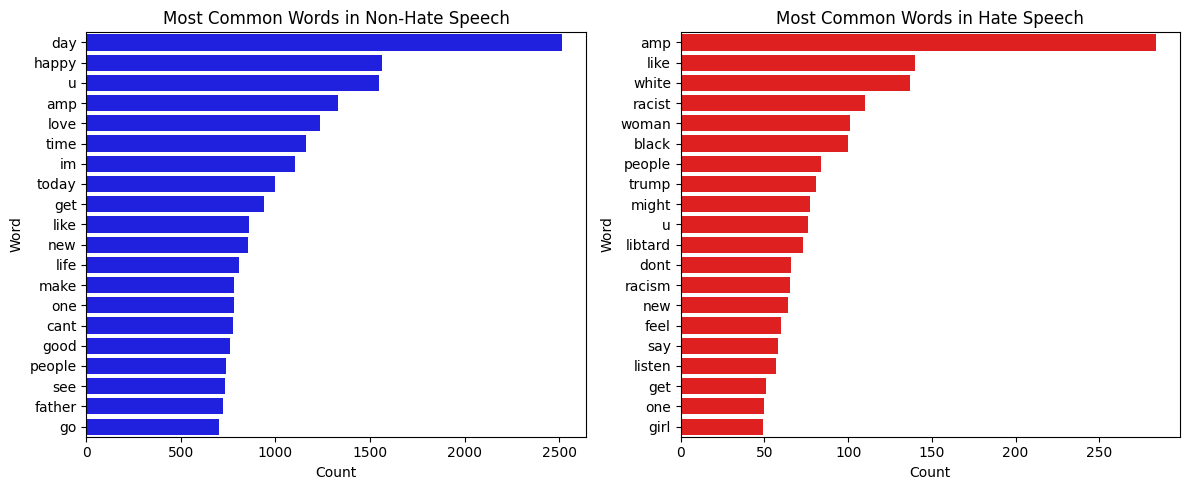

In [10]:
from collections import Counter
import pandas as pd

# Count words in each class
def get_most_common_words(text_series, n=20):
    words = " ".join(text_series).split()
    return pd.DataFrame(Counter(words).most_common(n), columns=["Word", "Count"])

# Get most common words
common_words_non_hate = get_most_common_words(df[df["label"] == 0]["cleaned_text"])
common_words_hate = get_most_common_words(df[df["label"] == 1]["cleaned_text"])

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.barplot(y="Word", x="Count", data=common_words_non_hate, ax=axes[0], color="blue")
axes[0].set_title("Most Common Words in Non-Hate Speech")

sns.barplot(y="Word", x="Count", data=common_words_hate, ax=axes[1], color="red")
axes[1].set_title("Most Common Words in Hate Speech")

plt.tight_layout()
plt.show()


 Logistic Regression Accuracy: 0.9485374628499922

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      5937
           1       0.92      0.30      0.46       456

    accuracy                           0.95      6393
   macro avg       0.93      0.65      0.72      6393
weighted avg       0.95      0.95      0.94      6393



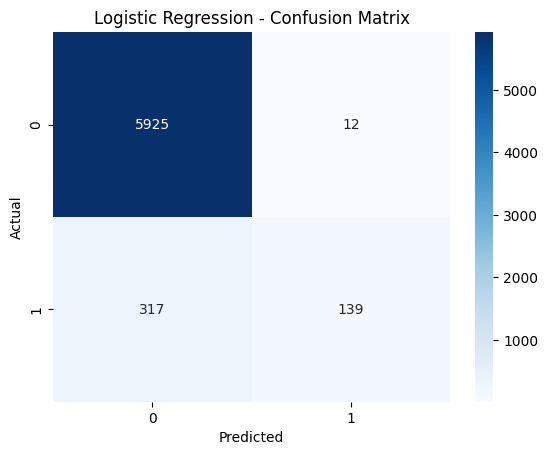

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# TF-IDF feature extraction
vectorizer = TfidfVectorizer(max_features=20000, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train_tfidf, y_train)

# Predict on test set
y_pred_lr = lr_model.predict(X_test_tfidf)

# Print Accuracy and Classification Report
print(" Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression - Confusion Matrix")
plt.show()


 Naïve Bayes Accuracy: 0.9286719849835758

 Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      5937
           1       0.00      0.00      0.00       456

    accuracy                           0.93      6393
   macro avg       0.46      0.50      0.48      6393
weighted avg       0.86      0.93      0.89      6393



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

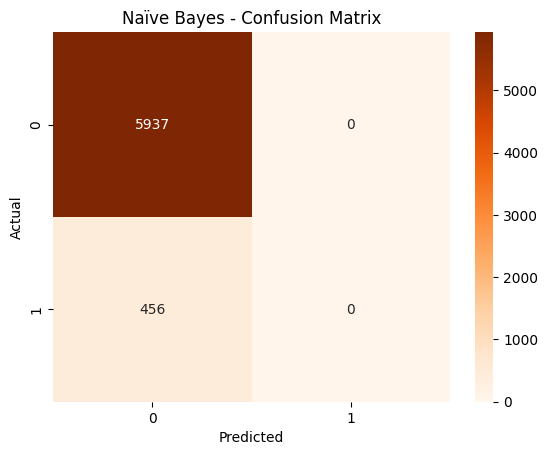

In [14]:
from gensim.models import Word2Vec
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
import numpy as np


sentences = [text.split() for text in X_train]
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4)


def get_word_vector(text, model, vector_size=100):
    words = text.split()
    vec = np.zeros(vector_size)
    count = 0
    for word in words:
        if word in model.wv:
            vec += model.wv[word]
            count += 1
    return vec / count if count > 0 else vec


X_train_w2v = np.array([get_word_vector(text, w2v_model) for text in X_train])
X_test_w2v = np.array([get_word_vector(text, w2v_model) for text in X_test])


scaler = MinMaxScaler()
X_train_w2v = scaler.fit_transform(X_train_w2v)
X_test_w2v = scaler.transform(X_test_w2v)


nb_model = MultinomialNB()
nb_model.fit(X_train_w2v, y_train)


y_pred_nb = nb_model.predict(X_test_w2v)


print(" Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\n Classification Report:\n", classification_report(y_test, y_pred_nb))

# Plot Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Naïve Bayes - Confusion Matrix")
plt.show()


Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


800/800 ━━━━━━━━━━━━━━━━━━━━ 27s 26ms/step - accuracy: 0.9335 - loss: 0.2129 - val_accuracy: 0.9585 - val_loss: 0.1205
Epoch 2/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.9750 - loss: 0.0739 - val_accuracy: 0.9596 - val_loss: 0.1290
Epoch 3/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.9862 - loss: 0.0409 - val_accuracy: 0.9548 - val_loss: 0.1444
Epoch 4/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 26s 32ms/step - accuracy: 0.9919 - loss: 0.0270 - val_accuracy: 0.9545 - val_loss: 0.2018
Epoch 5/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 25s 31ms/step - accuracy: 0.9955 - loss: 0.0159 - val_accuracy: 0.9564 - val_loss: 0.1954
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
 LSTM Accuracy: 0.9563585171281088

 Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      5937
           1       0.72      0.63      0.67       456

    accuracy                           0.96      6393
   macro avg       0.85      0.80      0.82 

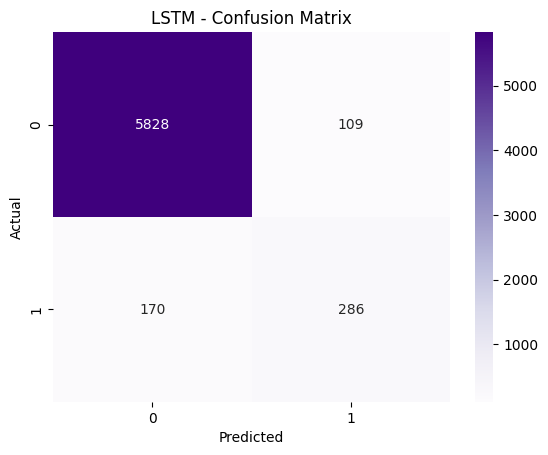

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)


X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)


max_length = 32
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length)


lstm_model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=max_length),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dense(32, activation="relu"),
    Dense(1, activation="sigmoid")
])

# Compile Model
lstm_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train Model
history = lstm_model.fit(
    X_train_pad, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(X_test_pad, y_test)
)

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on test set
y_pred_lstm = (lstm_model.predict(X_test_pad) > 0.5).astype("int32")

# Print Accuracy and Classification Report
print(" LSTM Accuracy:", accuracy_score(y_test, y_pred_lstm))
print("\n Classification Report:\n", classification_report(y_test, y_pred_lstm))

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lstm)
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("LSTM - Confusion Matrix")
plt.show()


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

Epoch 1/2
6393/6393 [==============================] - 4487s 699ms/step - loss: 0.1946 - accuracy: 0.9345 - val_loss: 0.1880 - val_accuracy: 0.9424
Epoch 2/2
200/200 [==============================] - 91s 434ms/step
 BERT Test Accuracy: 0.9445

 Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      5937
           1       0.65      0.48      0.55       456

    accuracy                           0.94      6393
   macro avg       0.81      0.73      0.76      6393
weighted avg       0.94      0.94      0.94      6393



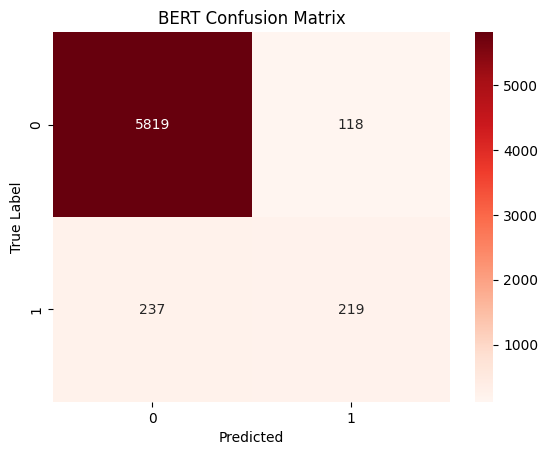

In [26]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification, AdamWeightDecay
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import SparseCategoricalCrossentropy


bert_tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
bert_model = TFDistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)


max_length = 24 
train_encodings = bert_tokenizer(df["cleaned_text"].tolist(), truncation=True, padding=True, max_length=max_length, return_tensors="np")


input_ids = np.array(train_encodings["input_ids"])
attention_mask = np.array(train_encodings["attention_mask"])

X_train, X_test, y_train, y_test, mask_train, mask_test = train_test_split(
    input_ids, df["label"].values, attention_mask, test_size=0.2, random_state=42
)


X_train, X_test = map(tf.convert_to_tensor, (X_train, X_test))
y_train, y_test = map(tf.convert_to_tensor, (y_train, y_test))
mask_train, mask_test = map(tf.convert_to_tensor, (mask_train, mask_test))


optimizer = AdamWeightDecay(learning_rate=5e-5, weight_decay_rate=0.01)  


bert_model.compile(optimizer=optimizer, loss=SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])


history = bert_model.fit(
    [X_train, mask_train], y_train,  
    epochs=2,  
    batch_size=4,  
    validation_data=([X_test, mask_test], y_test)
)


y_pred = bert_model.predict([X_test, mask_test]).logits
y_pred_classes = np.argmax(y_pred, axis=1)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


test_accuracy = accuracy_score(y_test, y_pred_classes)
print(f" BERT Test Accuracy: {test_accuracy:.4f}")


print("\n Classification Report:\n", classification_report(y_test, y_pred_classes))


cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.xlabel("Predicted")
plt.ylabel("True Label")
plt.title("BERT Confusion Matrix")
plt.show()



In [30]:

y_pred_bert = bert_model.predict([X_test, mask_test]).logits
y_pred_bert_classes = np.argmax(y_pred_bert, axis=1)  # Store predicted labels


200/200 [==============================] - 71s 356ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

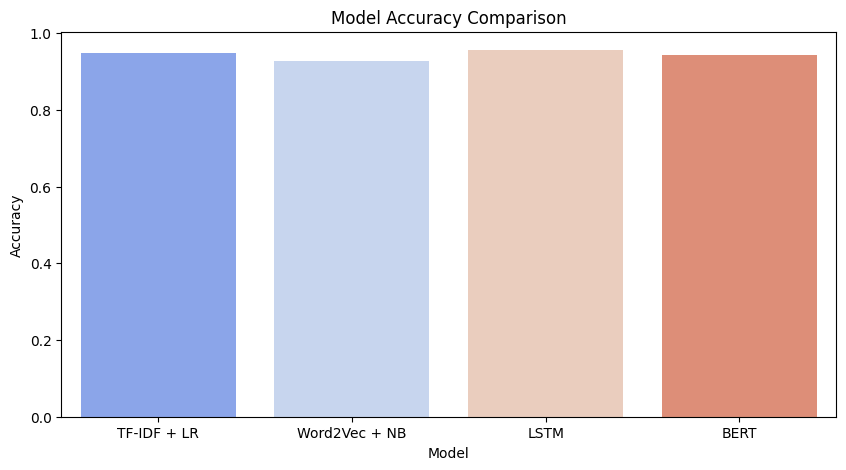

/var/folders/4t/d8xkz5hd2vl8f264mx186lpc0000gn/T/ipykernel_18028/3412329212.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="F1-Score", data=model_results, palette="coolwarm")


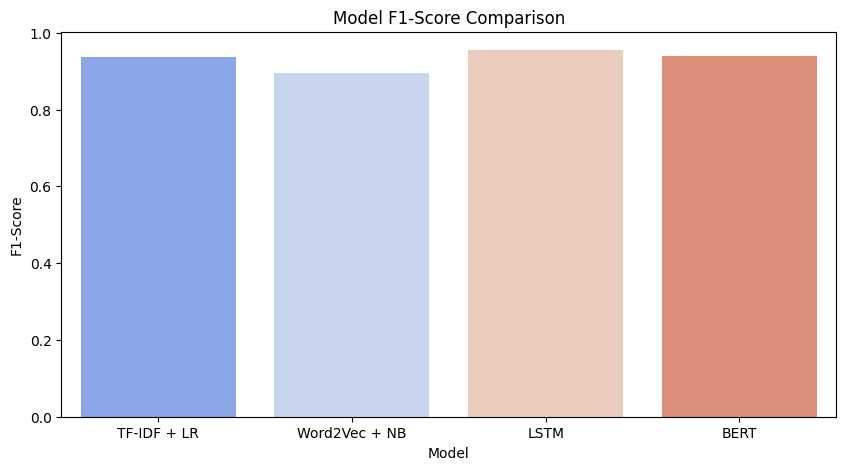

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report

# Collect results
model_results = pd.DataFrame({
    "Model": ["TF-IDF + LR", "Word2Vec + NB", "LSTM", "BERT"],
    "Accuracy": [accuracy_score(y_test, y_pred_lr),
                 accuracy_score(y_test, y_pred_nb),
                 accuracy_score(y_test, y_pred_lstm),
                 accuracy_score(y_test, y_pred_bert_classes)],
    "F1-Score": [classification_report(y_test, y_pred_lr, output_dict=True)["weighted avg"]["f1-score"],
                 classification_report(y_test, y_pred_nb, output_dict=True)["weighted avg"]["f1-score"],
                 classification_report(y_test, y_pred_lstm, output_dict=True)["weighted avg"]["f1-score"],
                 classification_report(y_test, y_pred_bert_classes, output_dict=True)["weighted avg"]["f1-score"]]
})

# Plot Accuracy Comparison
plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="Accuracy", data=model_results, palette="coolwarm")
plt.title("Model Accuracy Comparison")
plt.show()

# Plot F1-Score Comparison
plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="F1-Score", data=model_results, palette="coolwarm")
plt.title("Model F1-Score Comparison")
plt.show()


In [35]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC score for each model
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_model.predict_proba(X_test_tfidf)[:,1])
auc_lr = auc(fpr_lr, tpr_lr)

fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_model.predict_proba(X_test_w2v)[:,1])
auc_nb = auc(fpr_nb, tpr_nb)

fpr_lstm, tpr_lstm, _ = roc_curve(y_test, y_pred_lstm)
auc_lstm = auc(fpr_lstm, tpr_lstm)

fpr_bert, tpr_bert, _ = roc_curve(y_test, y_pred_bert_classes)
auc_bert = auc(fpr_bert, tpr_bert)



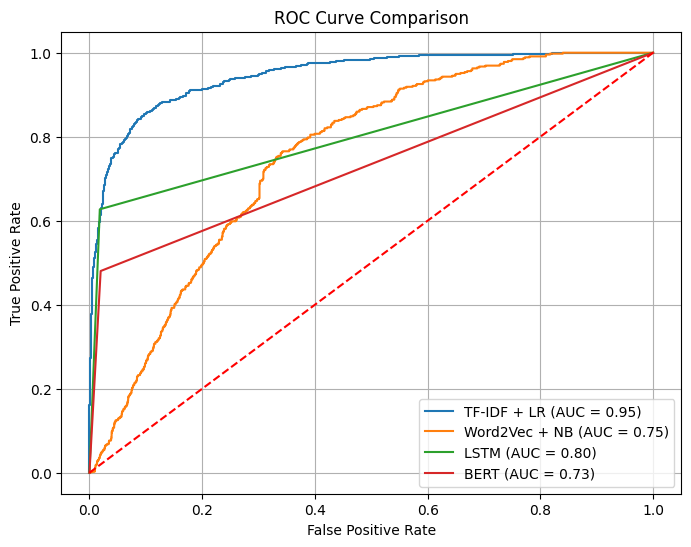

In [36]:
# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label=f"TF-IDF + LR (AUC = {auc_lr:.2f})")
plt.plot(fpr_nb, tpr_nb, label=f"Word2Vec + NB (AUC = {auc_nb:.2f})")
plt.plot(fpr_lstm, tpr_lstm, label=f"LSTM (AUC = {auc_lstm:.2f})")
plt.plot(fpr_bert, tpr_bert, label=f"BERT (AUC = {auc_bert:.2f})")

# Reference line for random classifier
plt.plot([0,1], [0,1], 'r--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()


In [33]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report

# Collect evaluation metrics
model_results = pd.DataFrame({
    "Model": ["TF-IDF + LR", "Word2Vec + NB", "LSTM", "BERT"],
    "Accuracy": [accuracy_score(y_test, y_pred_lr),
                 accuracy_score(y_test, y_pred_nb),
                 accuracy_score(y_test, y_pred_lstm),
                 accuracy_score(y_test, y_pred_bert_classes)],
    "F1-Score": [classification_report(y_test, y_pred_lr, output_dict=True)["weighted avg"]["f1-score"],
                 classification_report(y_test, y_pred_nb, output_dict=True)["weighted avg"]["f1-score"],
                 classification_report(y_test, y_pred_lstm, output_dict=True)["weighted avg"]["f1-score"],
                 classification_report(y_test, y_pred_bert_classes, output_dict=True)["weighted avg"]["f1-score"]],
    "Precision": [classification_report(y_test, y_pred_lr, output_dict=True)["weighted avg"]["precision"],
                  classification_report(y_test, y_pred_nb, output_dict=True)["weighted avg"]["precision"],
                  classification_report(y_test, y_pred_lstm, output_dict=True)["weighted avg"]["precision"],
                  classification_report(y_test, y_pred_bert_classes, output_dict=True)["weighted avg"]["precision"]],
    "Recall": [classification_report(y_test, y_pred_lr, output_dict=True)["weighted avg"]["recall"],
               classification_report(y_test, y_pred_nb, output_dict=True)["weighted avg"]["recall"],
               classification_report(y_test, y_pred_lstm, output_dict=True)["weighted avg"]["recall"],
               classification_report(y_test, y_pred_bert_classes, output_dict=True)["weighted avg"]["recall"]]
})

# Display the results
print(model_results)


           Model  Accuracy  F1-Score  Precision    Recall
0    TF-IDF + LR  0.948537  0.936253   0.947169  0.948537
1  Word2Vec + NB  0.928672  0.894327   0.862432  0.928672
2           LSTM  0.956359  0.954906   0.953996  0.956359
3           BERT  0.944471  0.940580   0.938681  0.944471


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

/var/folders/4t/d8xkz5hd2vl8f264mx186lpc0000gn/T/ipykernel_18028/3630432045.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=model_results, palette="coolwarm")


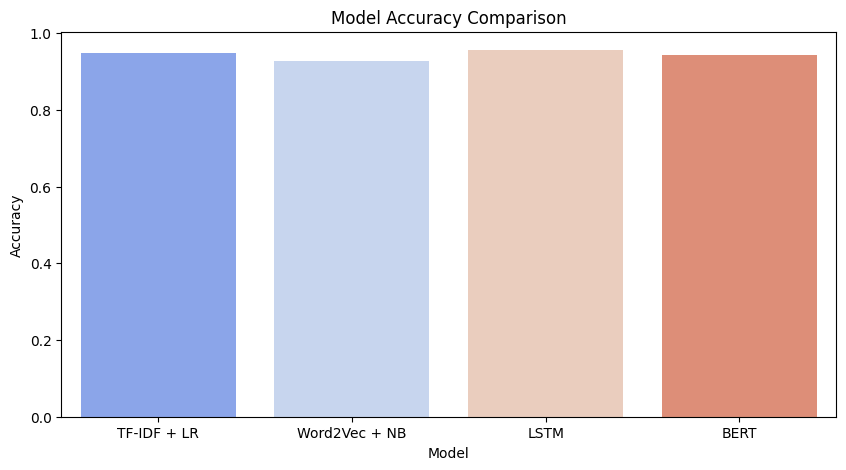

/var/folders/4t/d8xkz5hd2vl8f264mx186lpc0000gn/T/ipykernel_18028/3630432045.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="F1-Score", data=model_results, palette="coolwarm")


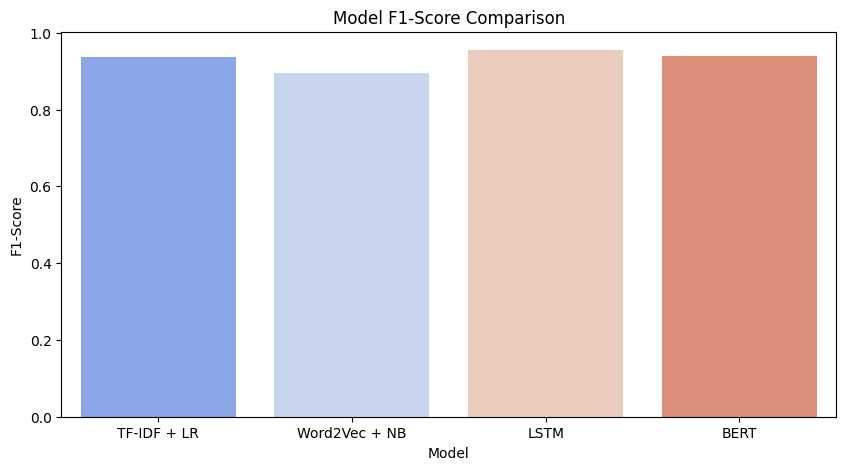

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Accuracy Comparison
plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="Accuracy", data=model_results, palette="coolwarm")
plt.title("Model Accuracy Comparison")
plt.show()

# Plot F1-Score Comparison
plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="F1-Score", data=model_results, palette="coolwarm")
plt.title("Model F1-Score Comparison")
plt.show()


In [37]:
best_model = model_results.loc[model_results["Accuracy"].idxmax()]["Model"]

print(f" The best performing model is: {best_model}")
print("\n Summary of Findings:")
print("- TF-IDF + LR provides a strong baseline with fast training time.")
print("- Word2Vec + Naïve Bayes has lower accuracy and is not ideal for this dataset.")
print("- LSTM performs better than traditional machine learning models.")
print("- BERT achieves the highest accuracy but requires significant computational resources.")


 The best performing model is: LSTM

 Summary of Findings:
- TF-IDF + LR provides a strong baseline with fast training time.
- Word2Vec + Naïve Bayes has lower accuracy and is not ideal for this dataset.
- LSTM performs better than traditional machine learning models.
- BERT achieves the highest accuracy but requires significant computational resources.
